# Traitement de l'image TP n° 4

<hr>
Écrire votre nom ici 

Nom : 
<hr>

## Commençons par faire afficher notre image
Nous travaillerons avec cette célèbre image
<p style="text-align:left";>
<img src="http://isn-icn-ljm.pagesperso-orange.fr/photo/joconde.png" width="204px" height="160px">
</p>
Pour utiliser/manipuler des images en Python, il faut utiliser une bibliothèque.

Nous utiliserons la bibliothèque: **pillow**

Si elle n'est pas déjà installée :   

In [0]:
#pip install pillow

**Pour ceux qui utilise la version(jupyter) de EduPython:**

Exécutez cette cellule au préalable afin d'importer le module display pour l'affichage dans le notebook

In [0]:
from IPython.display import display

**Le code suivant affiche l'image**

L'image est hébergée sur un serveur et est chargée dans ce notebook

**Exécutez le**

In [0]:
#chargement des bibliothèques 
from PIL import Image
import requests
from io import BytesIO
# chargement de la photo se trouvant à l'adresse donnée
url=" http://isn-icn-ljm.pagesperso-orange.fr/photo/joconde.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
#affichage de l'image
display(img)

**Dans tout ce TP la variable img contient l'image téléchargée depuis le serveur**

## Transformations géométriques

**Il s'agit de déplacer les pixels de l'image afin d'obtenir une image modifiée par symétrie**

Le code suivant réalise une symétrie qui renverse l'image de la Joconde

**Le principe est :**

* On travaille sur la moitié de l'image en hauteur
* Pour chacun de ces pixels
* On l'inverse avec son symétrique par rapport à l'axe horizontal de la moitié de l'image : ( x , y )  <--> ( x , 319-y )


In [0]:
#on récupère les dimensions de l'image
largeur,hauteur=img.size
#création d'une image vide
img2=Image.new('RGB',(largeur,hauteur))


#traitement
for y in range(0,hauteur//2,1):
    for x in range(0,largeur,1):
        pixel1=img.getpixel((x,y))
        pixel2=img.getpixel((x,319-y))
        img2.putpixel((x,y),pixel2)
        img2.putpixel((x,319-y),pixel1)
display(img2)

<hr> 

## À faire:

**Réalisez cette symétrie :**

<img src="http://isn-icn-ljm.pagesperso-orange.fr/photo/joconde_sym_2.png" width="150px" height="150px">


In [0]:
# Écrire le programme ici


<hr> 

## À faire:

**Imaginez une transformation et réalisez le programme**


In [0]:
# Écrire le programme ici

<hr>

# Pour aller plus loin : L'effet photomaton 

On souhaite écrire un programme qui effectue la transformation suivante:

<img src="http://isn-icn-ljm.pagesperso-orange.fr/photo/joconde_4.png" width="408px" height="320px">


**Le principe du photomaton :**

**Il faut redistribuer les pixels comme le montre le schéma suivant:**

<img src="http://isn-icn-ljm.pagesperso-orange.fr/photo/maton.png" width="500px" height="320px">

* Le quadrant supérieur gauche contiendra les pixels de coordonnées ( pair , pair )
* Le quadrant supérieur droit contiendra les pixels de coordonnées ( pair , impair )
* Le quadrant inférieur gauche contiendra les pixels de coordonnées ( impair , pair )
* Le quadrant inférieur droit contiendra les pixels de coordonnées ( impair , impair )

**Voici le code qui réalise cette transformation:**

408 320


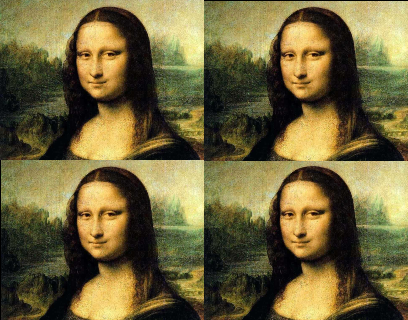

In [0]:
#on récupère les dimensions
largeur,hauteur=img.size
print(largeur,hauteur)

#Calcul des nouvelles coordonnées
def coord(x,y):
        if x%2==0 and y%2==0:#pair,pair
            return (x//2,y//2)
        if x%2==0 and y%2!=0:#pair,impair
            return (x//2+largeur//2,y//2+1)
        if x%2!=0 and y%2==0:#impair,pair
            return (x//2+1,y//2+hauteur//2)
        if x%2!=0 and y%2!=0:#impair,impair
            return (x//2+largeur//2,y//2+hauteur//2)
#traitement
def photomaton(image):
    #création d'une image vide
    im=Image.new('RGB',(largeur,hauteur))
    for y in range(0,hauteur,1):
        for x in range(0,largeur,1):
            var=coord(x,y)#appel de la fonction coord()
            pixel=image.getpixel((x,y))
            im.putpixel(var,pixel)
    return im

var = photomaton(img) #appel de la fonction photomaton()
display(var)

<hr> 

## À faire:

**Modifiez ce programme pour qu'il y ait 16 images, 32 images...**


In [0]:
# Écrire le programme modifié ici